# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [61]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [34]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

#### Влияние параметра strategy на кол-во итераций

In [54]:
strategy = (['best1bin', 
             'best1exp', 
             'rand1exp', 
             'randtobest1exp', 
             'currenttobest1exp',
             'best2exp', 
             'rand2exp', 
             'randtobest1bin', 
             'currenttobest1bin', 
             'best2bin', 
             'rand2bin', 
             'rand1bin'])
nit = []

#### Влияние параметра updating на кол-во итераций

In [71]:
nit2 = []

In [72]:
for i in range(len(strategy)):
    result = differential_evolution(ackley, bounds, strategy = strategy[i], updating = 'immediate', seed=42)
    nit2.append(result['nit'])
    print(strategy[i], nit2[i])

best1bin 90
best1exp 147
rand1exp 246
randtobest1exp 156
currenttobest1exp 1000
best2exp 244
rand2exp 341
randtobest1bin 101
currenttobest1bin 1000
best2bin 166
rand2bin 232
rand1bin 168


In [74]:
nit3 = []
for i in range(len(strategy)):
    result = differential_evolution(ackley, bounds, strategy = strategy[i], updating = 'deferred', seed=42)
    nit3.append(result['nit'])
    print(strategy[i], nit3[i])

best1bin 122
best1exp 163
rand1exp 286
randtobest1exp 195
currenttobest1exp 1000
best2exp 286
rand2exp 388
randtobest1bin 131
currenttobest1bin 1000
best2bin 189
rand2bin 258
rand1bin 198


<function matplotlib.pyplot.show(close=None, block=None)>

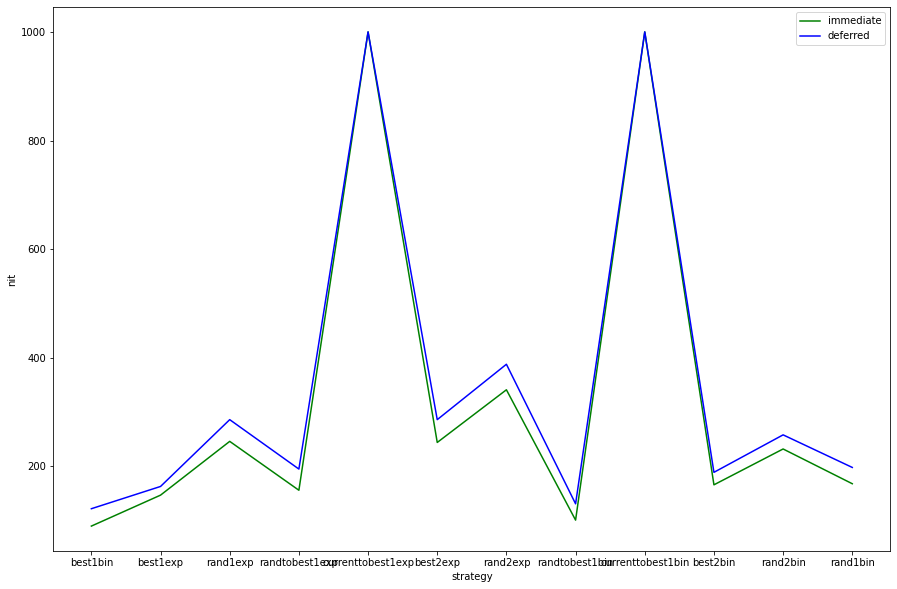

In [84]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
ax.plot(strategy, nit2, color = 'g', label = 'immediate')
ax.plot(strategy, nit3, color = 'b', label = 'deferred')
ax.legend()
ax.set_xlabel('strategy')
ax.set_ylabel('nit')
plt.show

Параметры strategy='best1bin', updating=immediate требуют минимальное количества итераций - 90.